# Simple 2-input single layer Perceptron
This program presents how 2 input single layer perceptron calculates decision boundary. It is a simple example, and I do not guarantee its correctness. It works but further testing is required. I am by no mean an expert in the field of machine learning, deep learning or artificial intelligence. I created this notebook as a way to reinforce my learning and provide myself with visual representation and steps that perceptron took to get to the solution. Descriptions provided may not be accurate, may lack sufficient details and in some cases may be plainly wrong.  This notebook might be useful to someone who is a student, tasked with calculating perceptron outcome by hand, to check whether their calculations are correct or not.

## Importing the libraries needed for program to work

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec

## Input data

You should adjust the input data to your own needs.

### xVector
In the following cell, we create two inputs for our perceptron as follows:
x1 = np.array([x$_{1}$, x$_{2}$], d) where:
x$_{1}$ - is the first input x coordinate
x$_{2}$ - is the first input y coordinate
d - is the desired output from function (y) - 1 or 0

Then we create the second input the same way. After this we create vector out of desired outputs. User should adjust the values of x1 and x2 and their desired outputs.
Example:
x1 = np.array([0.1, 0.9, 1])
x2 = np.array([1.0, 0.1, 0])
where in x1 - 0.1, 0.9 - are the coordinates and 1 is the desired output and in x2 - 1.0, 0.1 - are the coordinates and 0 is the desired output.

In [24]:
# Input data - set x1 and x2 according to your needs
x1 = np.array([0.1, 0.9, 1])
x2 = np.array([1.0, 0.1, 0])

# No need to touch this one
xVector = np.array([x1, x2])

### Learning rate

Learning rate of perceptron is a value between 0 and 1. It is used to adjust the weights of the perceptron after each iteration. Higher learning rate means that the perceptron will adjust the weights more quickly. The downside of too high learning rate is that the perceptron can overshoot the target value. So with higher learning rate we can get a better result faster, but at the risk of overshooting and in turn taking more iterations to reach the target value.

In [25]:
# Adjust learning rate according to your needs
learningRate = 0.1

### Weights
Weights are a set of values that indicate how much each input affects the output. Usually the weights are initialized randomly. After each iteration weights are adjusted according to the learning rate. They determine the direction and placement of the line. The process of learning focuses on adjusting the weights to get the correct decision boundary.

In [26]:
# Adjust weights according to your needs
weights = np.array([0.1, -0.1, -0.2 ])

### Rest of settings
You can leave the rest of settings as they are.
Bias -  is a value that is added to the output of the perceptron. It allows you to move the decision boundary away from the origin to better fit the data.
lpd - is the amount of correct decisions made by the perceptron. In this case if the perceptron makes the correct decision, lpd will increase by 1.
linePoints - is an array of points that were calculated by the perceptron. It is used to plot the line.
weightsArray - is an array of weights that were adjusted during the learning process. It is used to create legend for to plot.
totalIterations - is the amount of iterations that were made by the perceptron.
maxAmountOfIterations - is the maximum amount of iterations that were allowed to be made by the perceptron.

In [27]:
bias = 1;
lpd = 0;
linePoints = []
weightsArray = []
totalIterations = 0;
maxAmountOfIterations = 100;


## Main loop
In this loop we calculate the output of the perceptron and adjust the weights according to the learning rate, until the perceptron makes the correct decision or the maximum amount of iterations is reached. The calculated weights as well as points where line crosses x and y axes are stored in the weightsArray and linePoints array for plotting.

In [28]:
for i in range(maxAmountOfIterations):
    print ("Iteration: ", i)
    print ("Weights: ", weights)
    currK = i % 2
    weightsArray.append(weights)

    #Step 1
    if weights[1] != 0 and weights[0] != 0 and weights[2] != 0:
        x10 = np.array((-(weights[0] / weights[1]), 0))
        x20 = np.array((0, -(weights[0] / weights[2])))
    elif weights[0] == 0 and weights[1] != 0 and weights[2] != 0:
        x10 = np.array((0, 0))
        x20 = np.array((-(weights[0] / weights[2]), 1 ))
    linePoints.append([x10, x20])

    print("x10: ", x10)
    print("x20: ", x20)

    #Step 2
    currentX = np.array([1, xVector[currK][0], xVector[currK][1]])
    y = np.dot(currentX, weights)

    #Step 3
    if y >= 0:
        f = 1
    else:
        f = 0

    if f == xVector[currK][2]:
        lpd+=1

    #Step 4
    if f != xVector[currK][2]:
        weights = np.around(weights + learningRate * (xVector[currK][2] - f) * currentX, decimals=2)

    totalIterations+=1
    print ("LPD: ", lpd)
    print ("\n")

    if lpd == 2:
        break



Iteration:  0
Weights:  [ 0.1 -0.1 -0.2]
x10:  [1. 0.]
x20:  [0.  0.5]
LPD:  0


Iteration:  1
Weights:  [ 0.2  -0.09 -0.11]
x10:  [2.22222222 0.        ]
x20:  [0.         1.81818182]
LPD:  0


Iteration:  2
Weights:  [ 0.1  -0.19 -0.12]
x10:  [0.52631579 0.        ]
x20:  [0.         0.83333333]
LPD:  0


Iteration:  3
Weights:  [ 0.2  -0.18 -0.03]
x10:  [1.11111111 0.        ]
x20:  [0.         6.66666667]
LPD:  0


Iteration:  4
Weights:  [ 0.1  -0.28 -0.04]
x10:  [0.35714286 0.        ]
x20:  [0.  2.5]
LPD:  1


Iteration:  5
Weights:  [ 0.1  -0.28 -0.04]
x10:  [0.35714286 0.        ]
x20:  [0.  2.5]
LPD:  2




## Plotting
We plot the line based on weights and the points where line crossed x and y axes, that were calculated by the perceptron in each iteration.

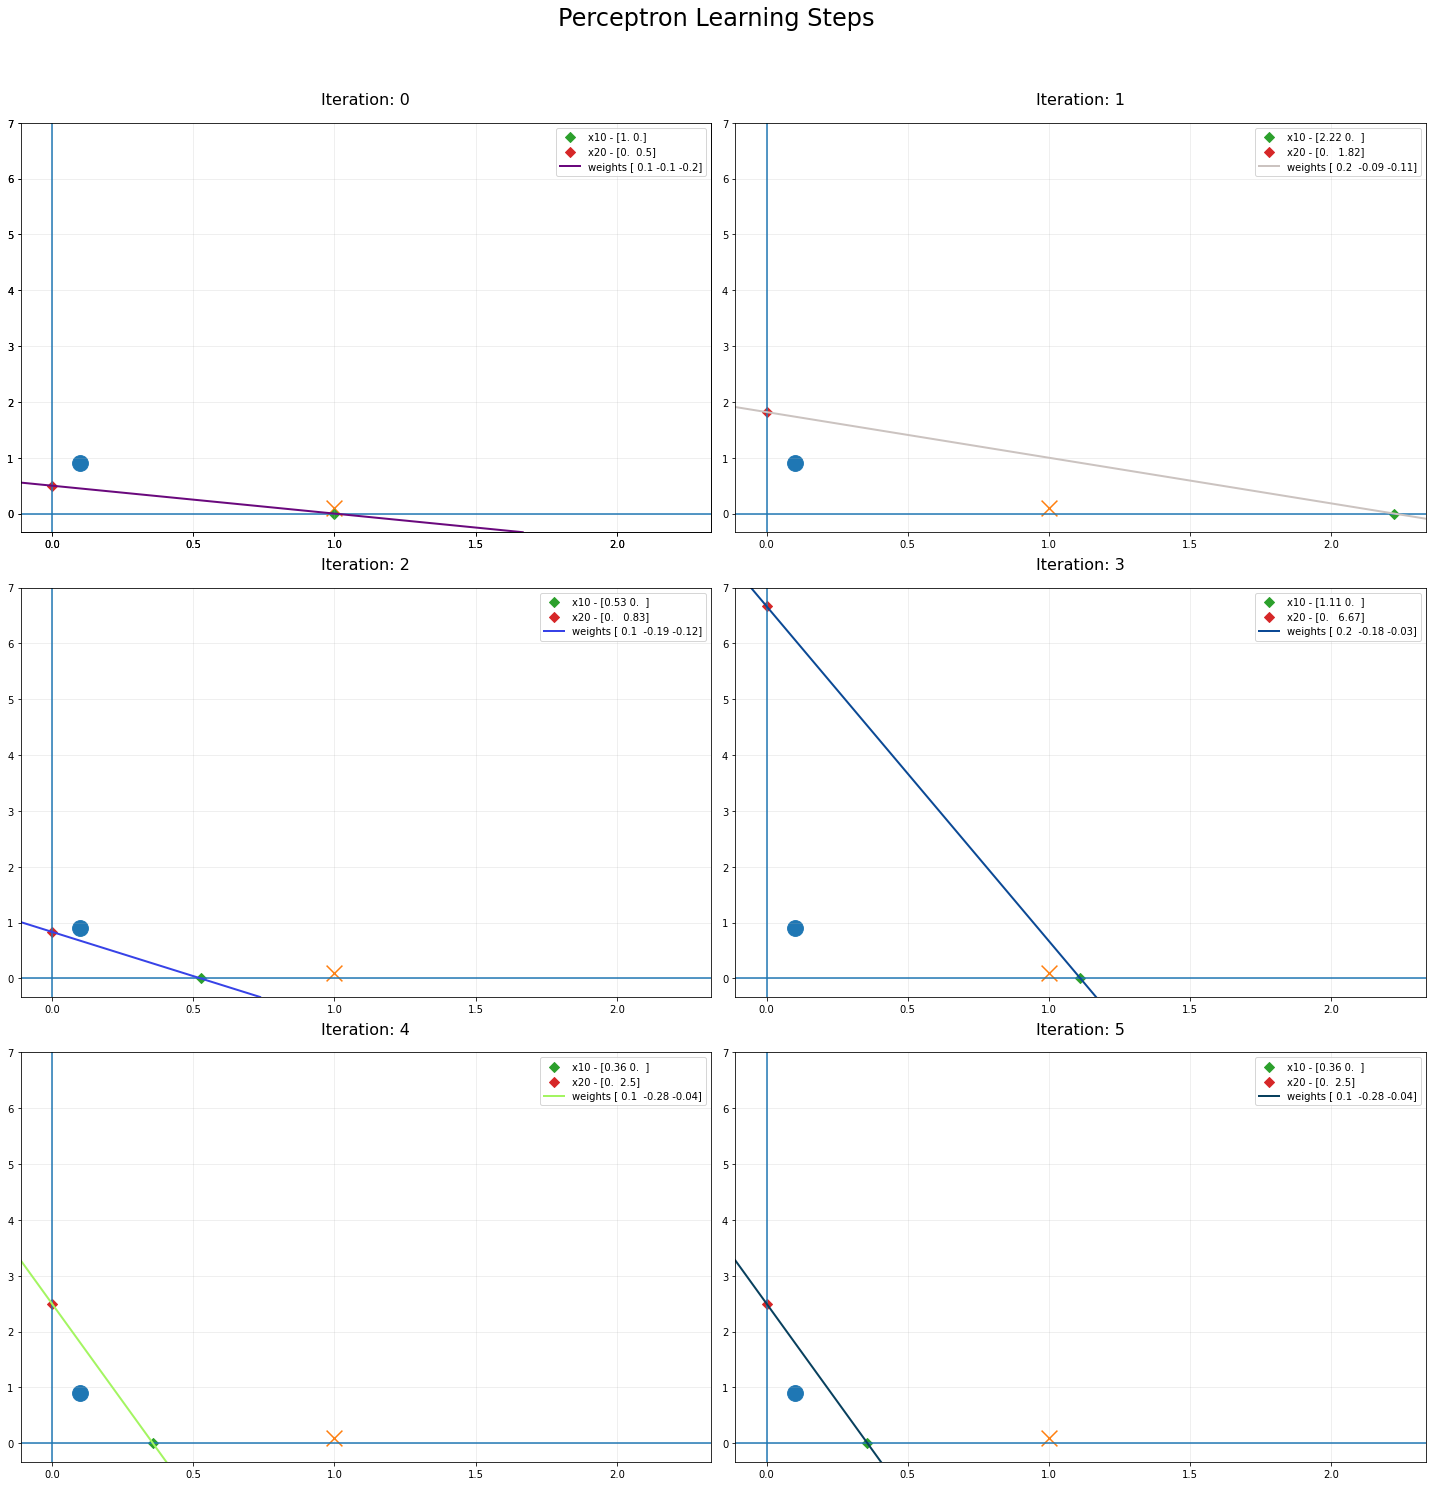

In [29]:
# Plotting the line
cols = 2
rows = int(math.ceil(totalIterations / cols))
fig = plt.figure(figsize=(20, 5 + rows * 5))
fig.suptitle('Perceptron Learning Steps', fontsize=24, y=1.03)
gs = gridspec.GridSpec(rows, cols)
mainax = fig.add_subplot(gs[0, 0])

for i in range(totalIterations):
    ax = fig.add_subplot(gs[i], sharex=mainax, sharey=mainax)
    ax.set_title('Iteration: ' + str(i), fontsize=16, y=1.03)
    ax.axhline()
    ax.axvline()
    ax.scatter(xVector[0][0], xVector[0][1], marker="o", s=250) # label='d =' + str(xVector[0][2])
    ax.scatter(xVector[1][0], xVector[1][1], marker="x", s=250) # label='d =' + str(xVector[1][2])
    ax.scatter(linePoints[i][0][0], linePoints[i][0][1], marker="D", s=50, label='x10 - ' + str(linePoints[i][0].round(2)))
    ax.scatter(linePoints[i][1][0], linePoints[i][1][1], marker="D", s=50, label='x20 - ' + str(linePoints[i][1].round(2)))
    ax.axline(linePoints[i][0], linePoints[i][1], linewidth=2, color=np.random.rand(3,), label='weights ' + str(weightsArray[i]), fillstyle="left")
    ax.grid(True, alpha=0.25)
    ax.legend()
fig.tight_layout()
plt.show()